In [23]:
import json
import os
from statsmodels.stats.contingency_tables import mcnemar
from collections import defaultdict
from tqdm import tqdm 
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import re
import seaborn


minilstm_res_path = "/Users/pablo/Dropbox/workspace/darth_linguo/results/consolidated/minilstm.csv"
results_root = "/Volumes/Elements/workspace/darth_linguo/results"

In [6]:
def load_param_numbers(target_folder, experiment_prefix):
    params_re = re.compile(r"Number of trainable parameters: (\d+)")
    param_numbers = {}
    for filename in tqdm(os.listdir(target_folder)):
        fullpath = os.path.join(target_folder, filename)
        if os.path.isdir(fullpath):
            parameters = filename.split("_")
            if len(parameters) != 3:
                continue
            exp_id = parameters[0]
            condition = parameters[1]
            dimensions = parameters[2]
            exp_name = f"{dimensions}_{condition}"
            if exp_id == experiment_prefix:
                log_file_fn = os.path.join(fullpath, "stdout.log")
                with open(log_file_fn, "r") as logfile:
                    log_str = logfile.read()
                    match_obj = re.search(params_re, log_str)
                    num_params = int(match_obj.group(1))
                param_numbers[exp_name] = num_params
    return param_numbers

In [7]:
param_n = load_param_numbers(results_root,"exp-3")
param_n

100%|██████████| 113/113 [00:00<00:00, 20605.01it/s]


{'32-32_bi-1-layer': 4247202,
 '32-64_bi-1-layer': 4280610,
 '64-128_bi-1-layer': 8659522,
 '64-64_bi-1-layer': 8527170,
 '32-32_bi-2-layer': 4272290,
 '32-64_bi-2-layer': 4379938,
 '64-128_bi-2-layer': 9054786,
 '64-64_bi-2-layer': 8626498,
 '32-32_bi-3-layer': 4297378,
 '32-64_bi-3-layer': 4479266,
 '64-128_bi-3-layer': 9450050,
 '64-64_bi-3-layer': 8725826,
 '32-32_uni-1-layer': 4238690,
 '32-64_uni-1-layer': 4255394,
 '64-128_uni-1-layer': 8559938,
 '64-64_uni-1-layer': 8493762,
 '128-128_uni-2-layer': 17185154,
 '32-32_uni-2-layer': 4247138,
 '32-64_uni-2-layer': 4288674,
 '64-128_uni-2-layer': 8692034,
 '64-64_uni-2-layer': 8527042,
 '32-32_uni-3-layer': 4255586,
 '32-64_uni-3-layer': 4321954,
 '64-128_uni-3-layer': 8824130,
 '64-64_uni-3-layer': 8560322,
 '128-128_uni-1-layer': 17053058,
 '128-128_uni-3-layer': 17317250,
 '128-128_bi-1-layer': 17185410,
 '128-128_bi-2-layer': 17580674,
 '128-128_bi-3-layer': 17975938}

In [9]:
stats_df = pd.read_csv(minilstm_res_path, index_col=0)
stats_df
for exp_name in stats_df.index:
    stats_df.loc[exp_name,"num_params"] = param_n[exp_name]

In [12]:
stats_df.sort_values(by='num_params')

,VA,AA,RV,total,num_params
32-32_uni-1-layer,0.750739,0.774362,0.842545,0.792569,4238690.0
32-32_uni-2-layer,0.797219,0.825984,0.857335,0.829824,4247138.0
32-32_bi-1-layer,0.785590,0.787675,0.845158,0.807539,4247202.0
32-64_uni-1-layer,0.803636,0.815701,0.851319,0.825282,4255394.0
32-32_uni-3-layer,0.792961,0.813878,0.841961,0.818545,4255586.0
32-32_bi-2-layer,0.820450,0.835627,0.875303,0.845859,4272290.0
32-64_bi-1-layer,0.818946,0.849021,0.873824,0.850206,4280610.0
32-64_uni-2-layer,0.818927,0.838109,0.861922,0.841700,4288674.0
32-32_bi-3-layer,0.821567,0.851012,0.879971,0.853831,4297378.0
32-64_uni-3-layer,0.837610,0.847789,0.876657,0.855453,4321954.0


In [49]:
for name in stats_df.index:
    dims = name.split("_")[0]
    embed_dim, hidden_dim = [int(dim) for dim in dims.split("-")] 
    archi = name.split("_")[1].split("-")
    directions = archi[0]
    layers = archi[1]
    stats_df.loc[name,"emdeddings"] = embed_dim 
    stats_df.loc[name,"hidden"] = hidden_dim 
    stats_df.loc[name,"directionality"] = directions
    stats_df.loc[name,"layers"] = int(layers)
    

In [115]:
stats_df.to_csv("/Users/pablo/Dropbox/workspace/darth_linguo/results/consolidated/stats_exp3.0.csv")

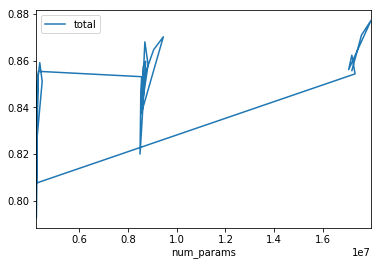

In [51]:
stats_df.plot(x='num_params',y='total')

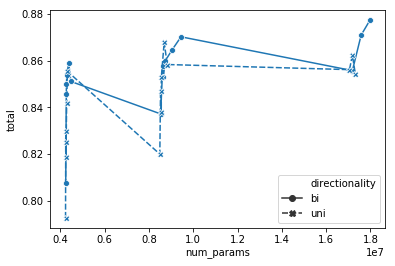

In [79]:
seaborn.lineplot(x='num_params',y='total', style="directionality", data = stats_df, markers=True)

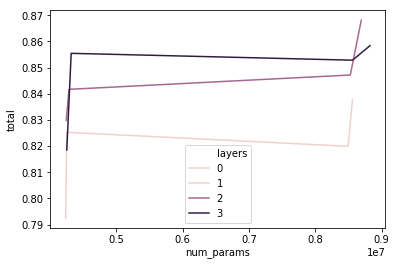

In [81]:
seaborn.lineplot(x='num_params',y='total', hue="layers",
                 data = stats_df.loc[stats_df.directionality=='uni'].loc[stats_df.emdeddings <128])

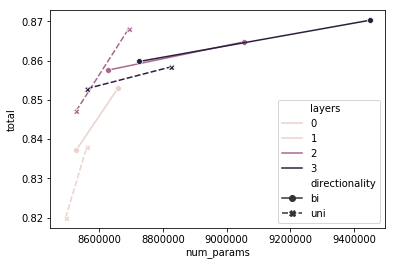

In [110]:
seaborn.lineplot(x='num_params',y='total', hue="layers", style="directionality",
                 data = stats_df.loc[stats_df.emdeddings==64], markers = True)

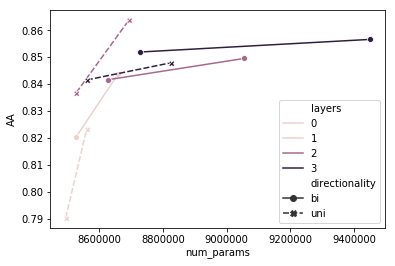

In [111]:
seaborn.lineplot(x='num_params',y='AA', hue="layers", style="directionality",
                 data = stats_df.loc[stats_df.emdeddings==64], markers = True)

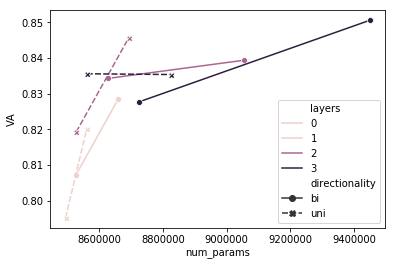

In [112]:
seaborn.lineplot(x='num_params',y='VA', hue="layers", style="directionality",
                 data = stats_df.loc[stats_df.emdeddings==64], markers = True)

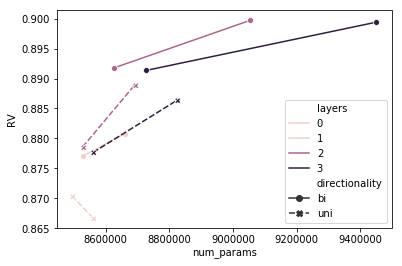

In [114]:
seaborn.lineplot(x='num_params',y='RV', hue="layers", style="directionality",
                 data = stats_df.loc[stats_df.emdeddings==64], markers = True)

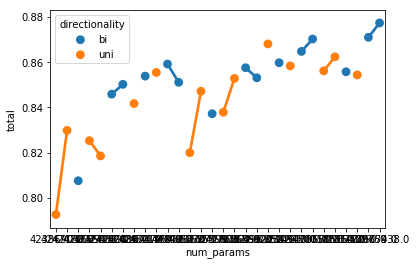

In [102]:
seaborn.pointplot(x='num_params',y='total', hue="directionality", style="layers",
                 data = stats_df)

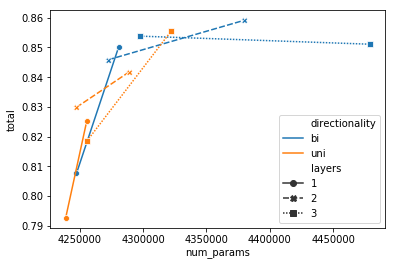

In [77]:
seaborn.lineplot(x='num_params',y='total', style="layers", hue = 'directionality',
                data=stats_df.loc[stats_df.emdeddings==32],
                 markers=True)

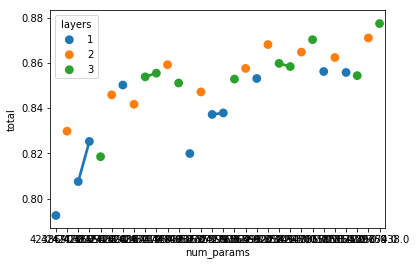

In [76]:
seaborn.pointplot(x='num_params',y='total', hue="layers",
                 data = stats_df)

In [74]:
stats_df.loc[stats_df.directionality=='uni'].loc[stats_df.emdeddings==32]

,VA,AA,RV,total,num_params,emdeddings,hidden,directionality,layers
32-32_uni-1-layer,0.750739,0.774362,0.842545,0.792569,4238690.0,32.0,32.0,uni,1
32-32_uni-2-layer,0.797219,0.825984,0.857335,0.829824,4247138.0,32.0,32.0,uni,2
32-32_uni-3-layer,0.792961,0.813878,0.841961,0.818545,4255586.0,32.0,32.0,uni,3
32-64_uni-1-layer,0.803636,0.815701,0.851319,0.825282,4255394.0,32.0,64.0,uni,1
32-64_uni-2-layer,0.818927,0.838109,0.861922,0.841700,4288674.0,32.0,64.0,uni,2
32-64_uni-3-layer,0.837610,0.847789,0.876657,0.855453,4321954.0,32.0,64.0,uni,3
